In [1]:
import sys
sys.path.append("/home/ly/workspace/mmsa")
seed = 1323
import numpy as np
import torch
from torch import nn
from torch import optim

np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

from models.vistanet_correct_v2 import *
from utils.train import *
from typing import *
from collections import Counter

from utils.load_yelp import *
from utils.dataset import *
from utils.train import *

In [2]:
config["embedding_dim"] = 100
config["word_hidden_size"] = 100
config["sentence_hidden_size"] = 200
config["freeze_embedding"] = True
config

{'task': 'CLS',
 'embedding_dim': 100,
 'embedding': None,
 'freeze_embedding': True,
 'word_hidden_size': 100,
 'word_layers': 1,
 'uniform_bound': 0.1,
 'sentence_hidden_size': 200,
 'sentence_layers': 1,
 'img_input_size': 4096,
 'visual_attention_size': 100,
 'dropout': 0.5,
 'output_size': 5,
 'bias_init': 1.0}

In [3]:
torch.cuda.set_device(1)

In [4]:
batch_size = 64
workers = 4
train_set, valid_set, test_set= load_glove_vgg_data(split811data, config)
train_loader, valid_loader, test_loader = get_loader(batch_size, workers, get_collate_fn(config), train_set, valid_set, test_set)
model = Model(config).cuda()
loss = nn.CrossEntropyLoss()
get_parameter_number(model), loss

/home/ly/miniconda3/envs/mmsa/lib/python3.6/site-packages/torch/nn/modules/rnn.py:60: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


({'Total': 6889805, 'Trainable': 2606405}, CrossEntropyLoss())

In [5]:
%%time
_interval = 5
lr = 1e-3
epoches = 50
stoping_step = 5
optimizer = get_regal_optimizer(model, optim.AdamW, lr)

viz = get_Visdom()
batch_loss_drawer = VisdomScalar(viz, f"batch_loss interval:{_interval}")
epoch_loss_drawer = VisdomScalar(viz, f"Train and valid loss", 2)
acc_drawer = VisdomScalar(viz, "Train and valid accuracy", 2)
text_writer = VisdomTextWriter(viz, "Training")

batch_loss = []
train_loss = []
valid_loss = []
train_acc = []
valid_acc = []

res, model = train_visdom_v2(model, optimizer, loss, viz, train_loader,
                          valid_loader, epoches, batch_loss, batch_loss_drawer,
                          train_loss, valid_loss, epoch_loss_drawer,
                          train_acc, valid_acc, acc_drawer, text_writer,
                         _interval=_interval, early_stop=stoping_step)

Setting up a new session...
No 1 epoch: 554it [02:10,  4.25it/s]
No 2 epoch: 554it [02:14,  4.12it/s]
No 3 epoch: 554it [02:12,  4.17it/s]
No 4 epoch: 554it [02:15,  4.09it/s]
No 5 epoch: 554it [02:12,  4.17it/s]
No 6 epoch: 554it [02:14,  4.13it/s]
No 7 epoch: 554it [02:15,  4.08it/s]
No 8 epoch: 554it [02:15,  4.09it/s]
No 9 epoch: 554it [02:15,  4.08it/s]
No 10 epoch: 554it [02:16,  4.07it/s]
No 11 epoch: 554it [02:16,  4.06it/s]


CPU times: user 23min 20s, sys: 2min 6s, total: 25min 26s
Wall time: 25min 34s


In [6]:
res

{'min_valid_loss': 0.873801197666616,
 'min_valid_loss_epoch': 6,
 'min_loss_train_acc': 0.6089998589363803,
 'min_valid_loss_train_loss': 0.8749537602838432,
 'min_loss_valid_acc': 0.6045146726862303,
 'last_valid_acc': 0.6074492099322799,
 'last_train_acc': 0.671632106079842,
 'last_epoch': 11,
 'last_train_loss': 0.7489618837387778,
 'last_valid_loss': 0.9259561188333998}

In [7]:
eval_model(model, test_loader, loss)

/home/ly/miniconda3/envs/mmsa/lib/python3.6/site-packages/torch/nn/modules/rnn.py:738: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at  /opt/conda/conda-bld/pytorch_1595629427286/work/aten/src/ATen/native/cudnn/RNN.cpp:1234.)
  self.num_layers, self.dropout, self.training, self.bidirectional)


((0.6128668171557562, 0.6130485619035138), 0.8646881477289221)

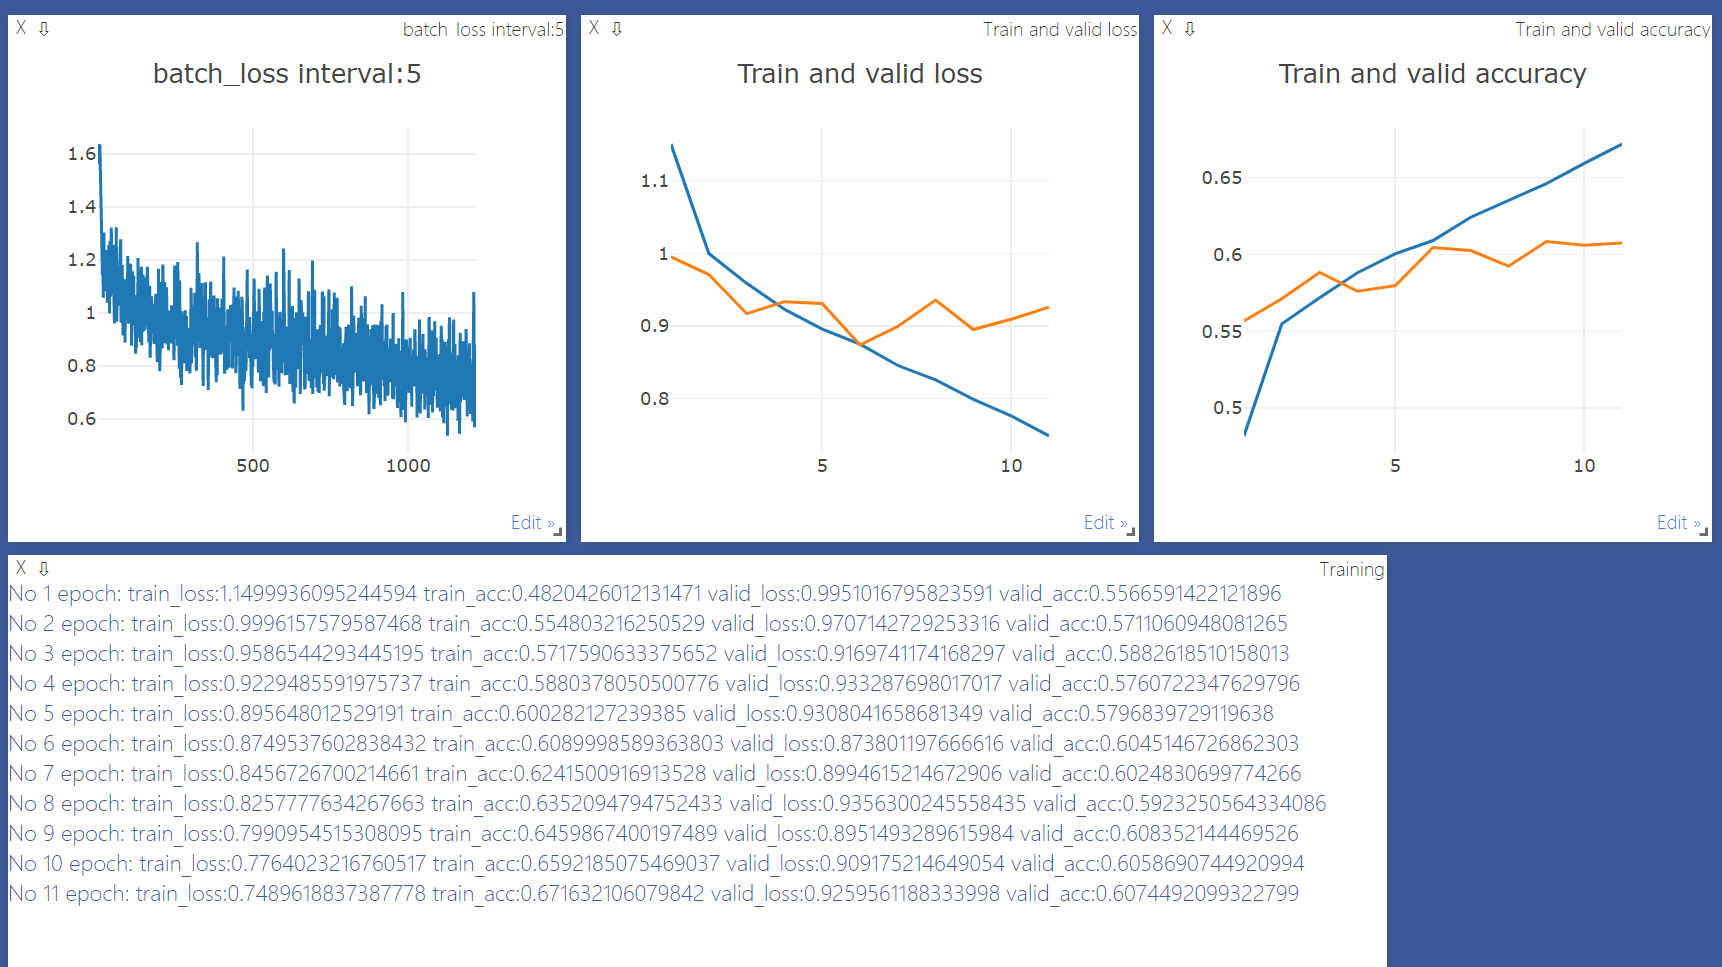

In [2]:
config["embedding_dim"] = 100
config["word_hidden_size"] = 100
config["sentence_hidden_size"] = 200
config["freeze_embedding"] = True
config["dropout"] = 0.
config

{'task': 'CLS',
 'embedding_dim': 100,
 'embedding': None,
 'freeze_embedding': True,
 'word_hidden_size': 100,
 'word_layers': 1,
 'uniform_bound': 0.1,
 'sentence_hidden_size': 200,
 'sentence_layers': 1,
 'img_input_size': 4096,
 'visual_attention_size': 100,
 'dropout': 0.0,
 'output_size': 5,
 'bias_init': 1.0}

In [3]:
%%time
torch.cuda.set_device(1)

batch_size = 64
workers = 4
train_set, valid_set, test_set= load_glove_vgg_data(split811data, config)
train_loader, valid_loader, test_loader = get_loader(batch_size, workers, get_collate_fn(config), train_set, valid_set, test_set)
model = Model(config).cuda()
loss = nn.CrossEntropyLoss()
get_parameter_number(model), loss


_interval = 5
lr = 1e-3
epoches = 50
stoping_step = 5
optimizer = get_regal_optimizer(model, optim.AdamW, lr)

viz = get_Visdom()
batch_loss_drawer = VisdomScalar(viz, f"batch_loss interval:{_interval}")
epoch_loss_drawer = VisdomScalar(viz, f"Train and valid loss", 2)
acc_drawer = VisdomScalar(viz, "Train and valid accuracy", 2)
text_writer = VisdomTextWriter(viz, "Training")

batch_loss = []
train_loss = []
valid_loss = []
train_acc = []
valid_acc = []

res, model = train_visdom_v2(model, optimizer, loss, viz, train_loader,
                          valid_loader, epoches, batch_loss, batch_loss_drawer,
                          train_loss, valid_loss, epoch_loss_drawer,
                          train_acc, valid_acc, acc_drawer, text_writer,
                         _interval=_interval, early_stop=stoping_step)

Setting up a new session...
No 1 epoch: 554it [02:08,  4.32it/s]
No 2 epoch: 554it [02:10,  4.24it/s]
No 3 epoch: 554it [02:12,  4.18it/s]
No 4 epoch: 554it [02:14,  4.12it/s]
No 5 epoch: 554it [02:13,  4.16it/s]
No 6 epoch: 554it [02:14,  4.11it/s]
No 7 epoch: 554it [02:14,  4.13it/s]
No 8 epoch: 554it [02:15,  4.10it/s]
No 9 epoch: 554it [02:13,  4.14it/s]


CPU times: user 18min 56s, sys: 1min 44s, total: 20min 41s
Wall time: 20min 47s


In [4]:
res

{'min_valid_loss': 0.8864428109293867,
 'min_valid_loss_epoch': 4,
 'min_loss_train_acc': 0.611426153195091,
 'min_valid_loss_train_loss': 0.8776565630255339,
 'min_loss_valid_acc': 0.6063205417607224,
 'last_valid_acc': 0.5911963882618511,
 'last_train_acc': 0.7538439836366201,
 'last_epoch': 9,
 'last_train_loss': 0.5891138322103813,
 'last_valid_loss': 1.0300497180452197}

In [5]:
eval_model(model, test_loader, loss)

/home/ly/miniconda3/envs/mmsa/lib/python3.6/site-packages/torch/nn/modules/rnn.py:738: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at  /opt/conda/conda-bld/pytorch_1595629427286/work/aten/src/ATen/native/cudnn/RNN.cpp:1234.)
  self.num_layers, self.dropout, self.training, self.bidirectional)


((0.6009029345372461, 0.600557641338845), 0.8786306167832885)